In [1]:
# Purva Rajan Dhadve


# Project 1 :- Tata Steel Machine Failure

# Import Pandas Library

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
# load csv
train_df=pd.read_csv("train (2) (1).csv")
test_df=pd.read_csv("test (1).csv")

# EDA

In [3]:
train_df.shape

(136429, 14)

In [4]:
test_df.shape

(90954, 13)

In [5]:
train_df.drop("id",axis=1,inplace=True)
test_df.drop("id",axis=1,inplace=True)

In [6]:
# we dont have outcome columns in test csv that why get common columns excluding outcome column
com_col=[col for col in train_df.columns if col in test_df.columns]

In [7]:
com_col

['Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

# Merge two CSV

In [8]:
#merge the common columns
merged_df=pd.concat([train_df, test_df],axis=0)
merged_df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L50096,L,300.6,309.6,1596,36.1,140,0.0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0.0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0.0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0.0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0.0,0,0,0,0,0


# Perform EDA on Merge Dataset

In [9]:
merged_df.shape

(227383, 13)

In [10]:
merged_df.isnull().sum()

Product ID                     0
Type                           0
Air temperature [K]            0
Process temperature [K]        0
Rotational speed [rpm]         0
Torque [Nm]                    0
Tool wear [min]                0
Machine failure            90954
TWF                            0
HDF                            0
PWF                            0
OSF                            0
RNF                            0
dtype: int64

In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227383 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Product ID               227383 non-null  object 
 1   Type                     227383 non-null  object 
 2   Air temperature [K]      227383 non-null  float64
 3   Process temperature [K]  227383 non-null  float64
 4   Rotational speed [rpm]   227383 non-null  int64  
 5   Torque [Nm]              227383 non-null  float64
 6   Tool wear [min]          227383 non-null  int64  
 7   Machine failure          136429 non-null  float64
 8   TWF                      227383 non-null  int64  
 9   HDF                      227383 non-null  int64  
 10  PWF                      227383 non-null  int64  
 11  OSF                      227383 non-null  int64  
 12  RNF                      227383 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 24.3+ MB


In [12]:
merged_df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,227383.000000,227383.000000,227383.000000,227383.000000,227383.000000,136429.000000,227383.000000,227383.000000,227383.000000,227383.000000,227383.000000
mean,299.861463,309.940392,1520.409938,40.343262,104.362925,0.015744,0.001522,0.005233,0.002379,0.003923,0.002278
std,1.860371,1.385219,139.231189,8.503195,63.927361,0.124486,0.038979,0.072153,0.048720,0.062510,0.047675
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,310.000000,1493.000000,40.500000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,301.200000,310.900000,1579.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
merged_df.corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
Air temperature [K],1.000000,0.856036,0.015081,-0.006021,0.017575,0.067744,0.005818,0.101676,0.006339,0.009733,0.003583
Process temperature [K],0.856036,1.000000,0.010081,-0.006266,0.013513,0.030966,0.006526,0.042362,0.001274,0.008379,0.005393
Rotational speed [rpm],0.015081,0.010081,1.000000,-0.778534,0.005937,-0.060868,-0.007050,-0.084110,0.052596,-0.061619,-0.002646
Torque [Nm],-0.006021,-0.006266,-0.778534,1.000000,-0.003629,0.145793,0.014981,0.102001,0.049928,0.108929,0.005899
Tool wear [min],0.017575,0.013513,0.005937,-0.003629,1.000000,0.056448,0.045167,0.007793,0.005773,0.064841,-0.002420
Machine failure,0.067744,0.030966,-0.060868,0.145793,0.056448,1.000000,0.311919,0.564507,0.383941,0.494668,0.001428
TWF,0.005818,0.006526,-0.007050,0.014981,0.045167,0.311919,1.000000,0.009678,0.037463,0.044479,0.002868
HDF,0.101676,0.042362,-0.084110,0.102001,0.007793,0.564507,0.009678,1.000000,0.038994,0.061753,0.001648
PWF,0.006339,0.001274,0.052596,0.049928,0.005773,0.383941,0.037463,0.038994,1.000000,0.092244,0.001453
OSF,0.009733,0.008379,-0.061619,0.108929,0.064841,0.494668,0.044479,0.061753,0.092244,1.000000,-0.001523


In [14]:
unique=merged_df["Machine failure"].unique()
unique

array([ 0.,  1., nan])

In [15]:
# we have only 2148 of failure data.
merged_df['Machine failure'].value_counts()

0.0    134281
1.0      2148
Name: Machine failure, dtype: int64

# Visualization

In [16]:
# for visualization we import libraries
import matplotlib.pyplot as plt
import seaborn as sns

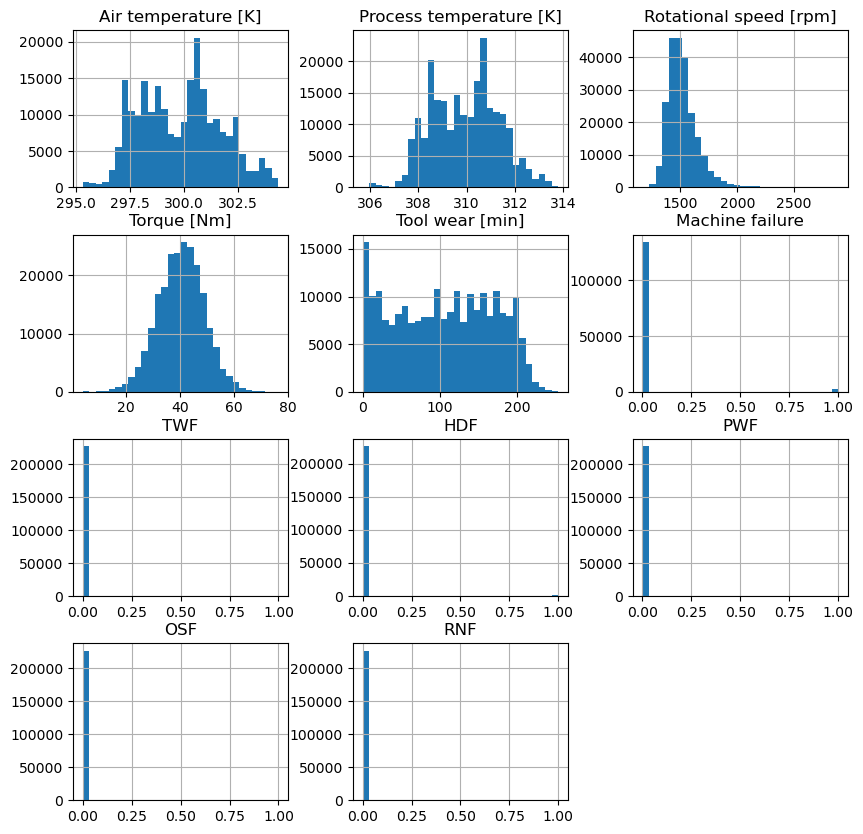

In [17]:
# Distribution of numerical features
# histogram for numerical features to observe distribution, skewnwss,and potential outliers.
# it helps to identify normal vs. abnormal operating ranges.
num_col=merged_df.select_dtypes(include='number').columns
merged_df[num_col].hist(bins=30, figsize=(10,10))
plt.show()

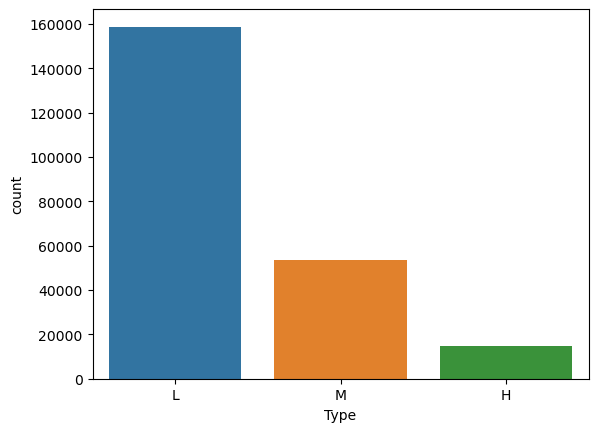

In [18]:
# countplot for categorical features to check class balance or distribution.
# checks for imbalances that may affect model training
sns.countplot(x="Type", data=merged_df)
plt.show()

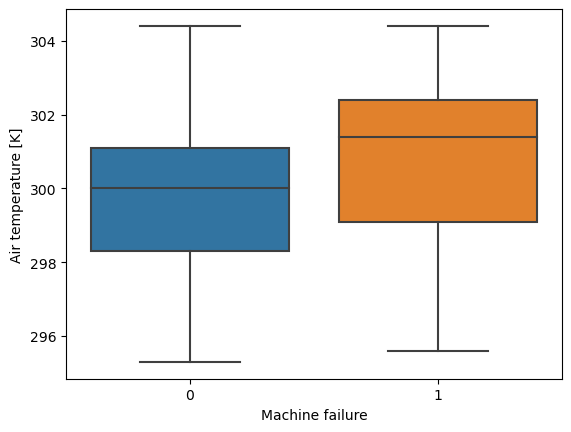

In [19]:
# Relationship with Target Variables
# boxplot for compare distributions of numerical features by target variable
# it identifies differences in operating conditions between failed and non-failed states.
sns.boxplot(x='Machine failure',y='Air temperature [K]',data=train_df)
plt.show()

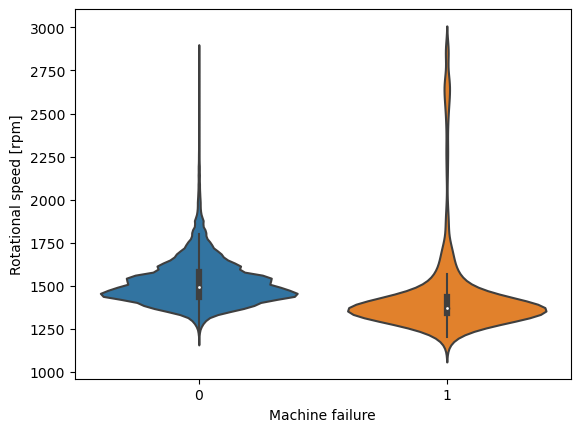

In [20]:
# violin plot is similar to boxplots but also shows the kernel density estimation
sns.violinplot(x='Machine failure',y='Rotational speed [rpm]',data=train_df)
plt.show()

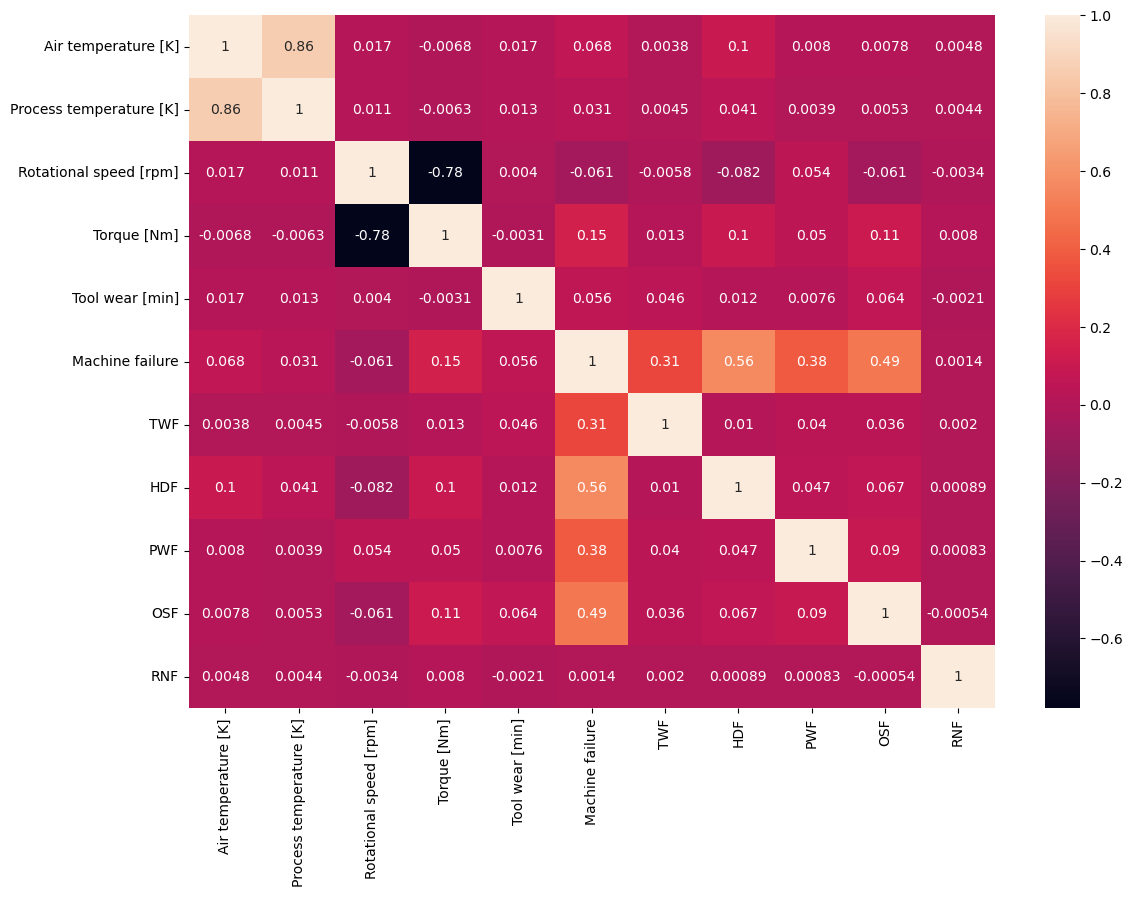

In [21]:
# for correlation Analysis
# Heatmap of correlation to find correlated features,which may need dimensionality reduction
# it identifies multicollinearity that could impact model performance.
plt.figure(figsize=(13,9))
sns.heatmap(train_df.corr(),annot=True,cmap=None)
plt.show()

# Split the Data

In [22]:
# then we keep the outcomes seperate for trainning the model and evaluation
x_train=train_df.drop(columns=['Machine failure']) #features
y_train=train_df['Machine failure']  #target
x_test=test_df

In [23]:
x_train

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0
136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0
136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0
136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0


In [24]:
x_test

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
90949,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [25]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
136424    0
136425    0
136426    0
136427    0
136428    0
Name: Machine failure, Length: 136429, dtype: int64

In [26]:
x_train['Product ID'].isna().sum()

0

In [27]:
x_train['Product ID'].dtype

dtype('O')

In [28]:
x_train['Product ID']=x_train['Product ID'].astype(str)
x_test['Product ID']=x_test['Product ID'].astype(str)

In [29]:
#check unique values 
print(x_train['Product ID'].unique()[:10])

['L50096' 'M20343' 'L49454' 'L53355' 'M24050' 'M24300' 'L56736' 'L55488'
 'L56397' 'L55067']


In [30]:
x_train['Product ID']=x_train['Product ID'].str.replace('[^A-Za-z0-9]','',regex=True)
x_test['Product ID']=x_test['Product ID'].str.replace('[^A-Za-z0-9]','',regex=True)

In [31]:
x_train['Product ID']

0         L50096
1         M20343
2         L49454
3         L53355
4         M24050
           ...  
136424    M22284
136425    H38017
136426    L54690
136427    L53876
136428    L47937
Name: Product ID, Length: 136429, dtype: object

In [32]:
x_train['Product ID'].dtype

dtype('O')

In [33]:
# now data is equally split we need to find out outcomes of y_test
#spliting part is done

In [34]:
xtrain=x_train.iloc[:,:7]

In [35]:
xtest=x_test.iloc[:,:7]

In [36]:
xtrain

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,L50096,L,300.6,309.6,1596,36.1,140
1,M20343,M,302.6,312.1,1759,29.1,200
2,L49454,L,299.3,308.5,1805,26.5,25
3,L53355,L,301.0,310.9,1524,44.3,197
4,M24050,M,298.0,309.0,1641,35.4,34
...,...,...,...,...,...,...,...
136424,M22284,M,300.1,311.4,1530,37.5,210
136425,H38017,H,297.5,308.5,1447,49.1,2
136426,L54690,L,300.5,311.8,1524,38.5,214
136427,L53876,L,301.7,310.9,1447,46.3,42


In [37]:
xtest

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,L50896,L,302.3,311.5,1499,38.0,60
1,L53866,L,301.7,311.0,1713,28.8,17
2,L50498,L,301.3,310.4,1525,37.7,96
3,M21232,M,300.1,309.6,1479,47.6,5
4,M19751,M,303.4,312.3,1515,41.3,114
...,...,...,...,...,...,...,...
90949,L51130,L,302.3,311.4,1484,40.4,15
90950,L47783,L,297.9,309.8,1542,33.8,31
90951,L48097,L,295.6,306.2,1501,41.4,187
90952,L48969,L,298.1,307.8,1534,40.3,69


# Encoding of categorical data

In [38]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
xtrain[["Product ID","Type"]]=oe.fit_transform(xtrain[["Product ID","Type"]])

In [39]:
xtest[["Product ID","Type"]]=oe.fit_transform(xtest[["Product ID","Type"]])

In [40]:
xtrain

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2752.0,1.0,300.6,309.6,1596,36.1,140
1,8620.0,2.0,302.6,312.1,1759,29.1,200
2,2344.0,1.0,299.3,308.5,1805,26.5,25
3,4704.0,1.0,301.0,310.9,1524,44.3,197
4,9727.0,2.0,298.0,309.0,1641,35.4,34
...,...,...,...,...,...,...,...
136424,9220.0,2.0,300.1,311.4,1530,37.5,210
136425,838.0,0.0,297.5,308.5,1447,49.1,2
136426,5502.0,1.0,300.5,311.8,1524,38.5,214
136427,5024.0,1.0,301.7,310.9,1447,46.3,42


In [41]:
xtest

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,3203.0,1.0,302.3,311.5,1499,38.0,60
1,4986.0,1.0,301.7,311.0,1713,28.8,17
2,2958.0,1.0,301.3,310.4,1525,37.7,96
3,8828.0,2.0,300.1,309.6,1479,47.6,5
4,8368.0,2.0,303.4,312.3,1515,41.3,114
...,...,...,...,...,...,...,...
90949,3332.0,1.0,302.3,311.4,1484,40.4,15
90950,1347.0,1.0,297.9,309.8,1542,33.8,31
90951,1533.0,1.0,295.6,306.2,1501,41.4,187
90952,2040.0,1.0,298.1,307.8,1534,40.3,69


# Oversampling for imbalance Data

In [42]:
from imblearn.combine import SMOTETomek

# SMOTE is not working acurately here thats why i use SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
xtrain_resampled, y_train_resampled = smote_tomek.fit_resample(xtrain,y_train)

# Create model  

In [43]:
# for the Tata steel machine failure dataset the choice of ML algorithm depends on the nature of the target variables(TWF,HDF,PWF,OSF,RNF),
# which are typically multi-label classification problems.Thats why i use tree based model.

In [44]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(xtrain_resampled,y_train_resampled)

RandomForestClassifier(random_state=42)

In [45]:
print(model.score(xtrain_resampled,y_train_resampled)*100)

99.95735671482116


In [46]:
y_test_pred = model.predict(xtest)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
# Add predictions to the test DataFrame
xtest["MachineFailure_Pred"] = y_test_pred

In [48]:
# Save to a new CSV 
xtest.to_csv('test_data_with_predictions.csv',index=False)

print(xtest.head())

   Product ID  Type  Air temperature [K]  Process temperature [K]  \
0      3203.0   1.0                302.3                    311.5   
1      4986.0   1.0                301.7                    311.0   
2      2958.0   1.0                301.3                    310.4   
3      8828.0   2.0                300.1                    309.6   
4      8368.0   2.0                303.4                    312.3   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  MachineFailure_Pred  
0                    1499         38.0               60                    0  
1                    1713         28.8               17                    0  
2                    1525         37.7               96                    0  
3                    1479         47.6                5                    0  
4                    1515         41.3              114                    0  


In [49]:
# This are the final outputs of the test dataset.
pred_test_data=pd.read_csv("test_data_with_predictions.csv")
pred_test_data.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],MachineFailure_Pred
0,3203.0,1.0,302.3,311.5,1499,38.0,60,0
1,4986.0,1.0,301.7,311.0,1713,28.8,17,0
2,2958.0,1.0,301.3,310.4,1525,37.7,96,0
3,8828.0,2.0,300.1,309.6,1479,47.6,5,0
4,8368.0,2.0,303.4,312.3,1515,41.3,114,0


In [50]:
pred_test_data['MachineFailure_Pred'].unique()

array([0, 1], dtype=int64)

# Try predictions on some values

In [51]:
#model works perfectly
model.predict([[3203.0,1.0,302.3,311.5,1499,38.0,60]])

array([0], dtype=int64)

In [52]:
model.predict([[8828.0,2.0,300.1,309.6,1479,47.6,5]])

array([0], dtype=int64)

In [63]:
model.predict([[4403.0,1.0,301.4,311.8,1412,52.3,208]])

array([1], dtype=int64)